<a href="https://colab.research.google.com/github/anisafitriani1122/Proyek-Kerja-Praktik/blob/main/KP_AF_PG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
impor  pandas  sebagai  pd
impor  numpy  sebagai  np
impor  matplotlib.pyplot  sebagai  plt
%matplotlib  sebaris

In [ ]:
# mengimpor dataset
dataset = pd.read_excel('/content/sample_data/NSFC_PG_2.xlsx')
dataset

,Section,Hectares Harv (Ha),Yield (Ton/Ha)
0,185C,8.41,46.648038
1,136D1,4.03,51.095533
2,123F,9.27,51.178101
3,140B,10.03,51.425922
4,129C,7.39,52.728146
...,...,...,...
210,105B,7.98,113.841729
211,176C,4.20,114.749286
212,175B2,7.70,116.594416
213,175D,4.05,118.996049


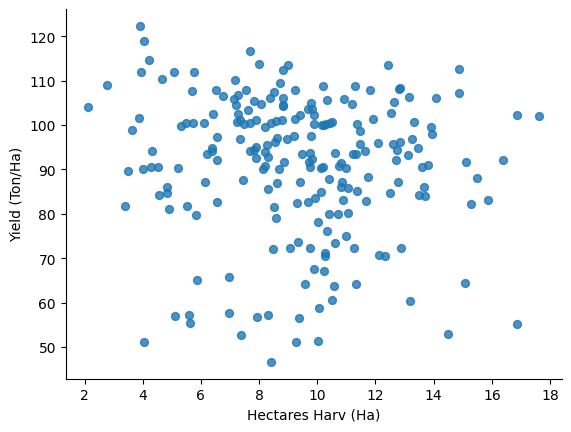

In [ ]:
# @title Hectares Harvest (Ha) vs Yield (Ton/Ha)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Hectares Harv (Ha)', y='Yield (Ton/Ha)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X = dataset.iloc[:, [1,2]].values
print(dataset)
print(X)

    Section  Hectares Harv (Ha)  Yield (Ton/Ha)
0      185C                8.41       46.648038
1     136D1                4.03       51.095533
2      123F                9.27       51.178101
3      140B               10.03       51.425922
4      129C                7.39       52.728146
..      ...                 ...             ...
210    105B                7.98      113.841729
211    176C                4.20      114.749286
212   175B2                7.70      116.594416
213    175D                4.05      118.996049
214   176C3                3.91      122.319437

[215 rows x 3 columns]
[[  8.41        46.64803805]
 [  4.03        51.0955335 ]
 [  9.27        51.1781014 ]
 [ 10.03        51.42592223]
 [  7.39        52.72814614]
 [ 14.49        52.93802622]
 [ 16.86        55.19786477]
 [  5.61        55.47308378]
 [  9.36        56.61698718]
 [  7.93        56.67553594]
 [  5.1         57.06117647]
 [  5.6         57.2       ]
 [  8.29        57.31531966]
 [  6.95        57.6617

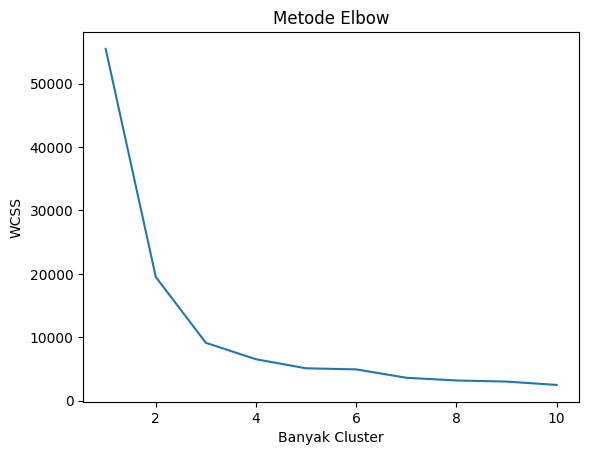

[55483.357843872305, 19508.7988026511, 9122.704570156116, 6534.568966587198, 5106.206650581742, 4935.100384745382, 3613.9587491282455, 3183.848057907886, 3012.684369349625, 2484.0614882658765]


In [ ]:
# menggunakan metode elbow untuk menentukan cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Banyak Cluster')
plt.ylabel('WCSS')
plt.show()
print(wcss)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.5692136928985914
For n_clusters = 3 The average silhouette_score is : 0.5158080253275353
For n_clusters = 4 The average silhouette_score is : 0.4814879039954556
For n_clusters = 5 The average silhouette_score is : 0.4181296985507267
For n_clusters = 6 The average silhouette_score is : 0.4202177447808129
For n_clusters = 7 The average silhouette_score is : 0.38338660616477815
For n_clusters = 8 The average silhouette_score is : 0.3769539296814784


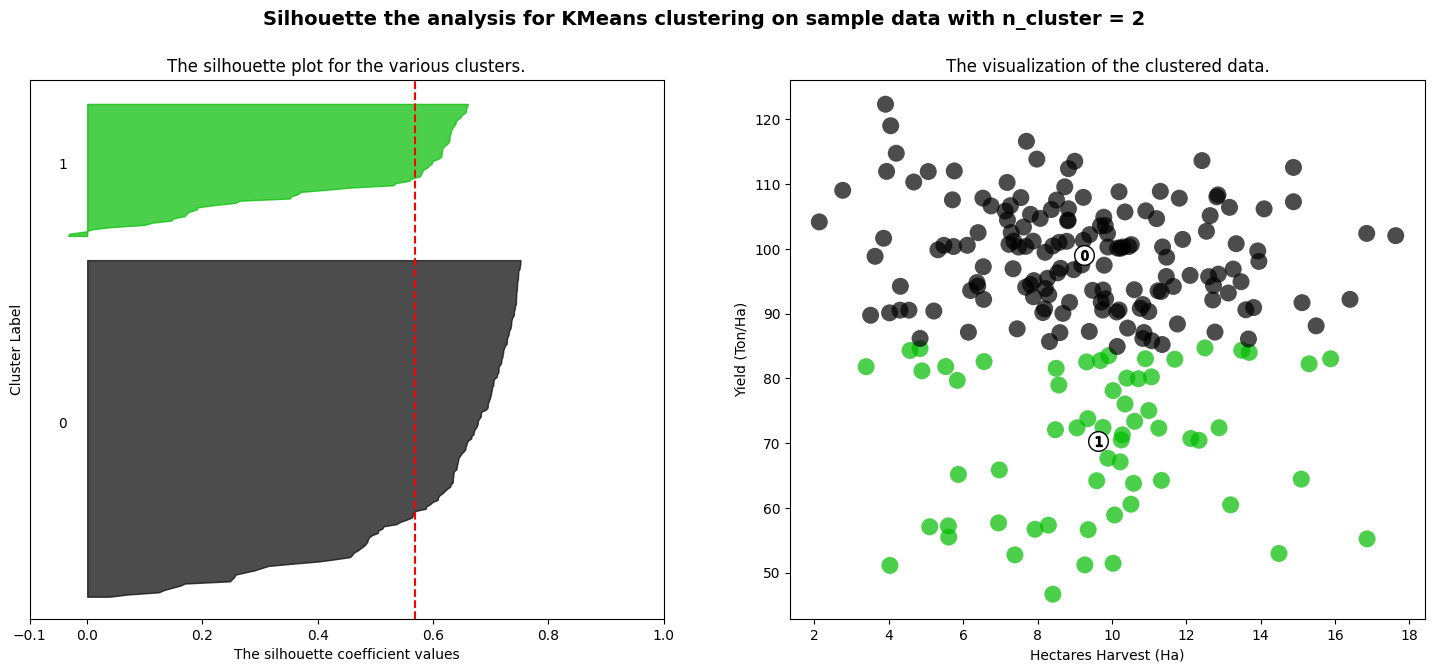

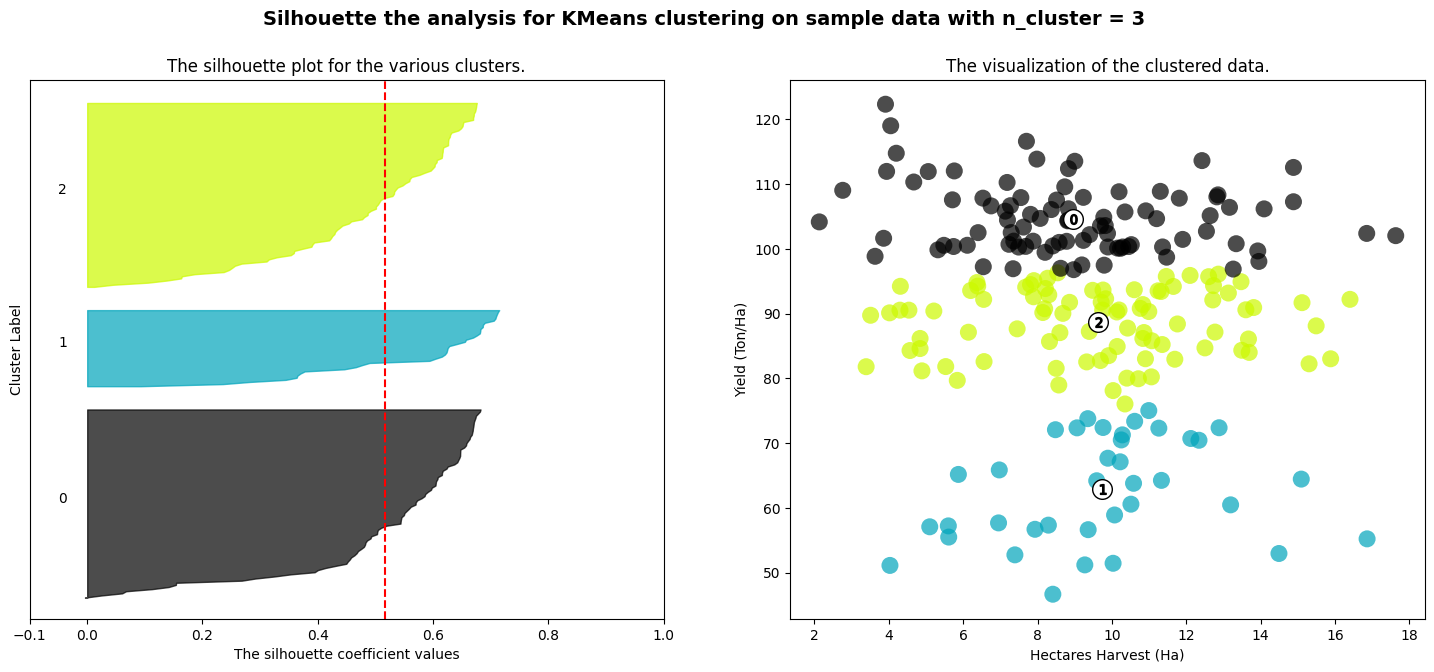

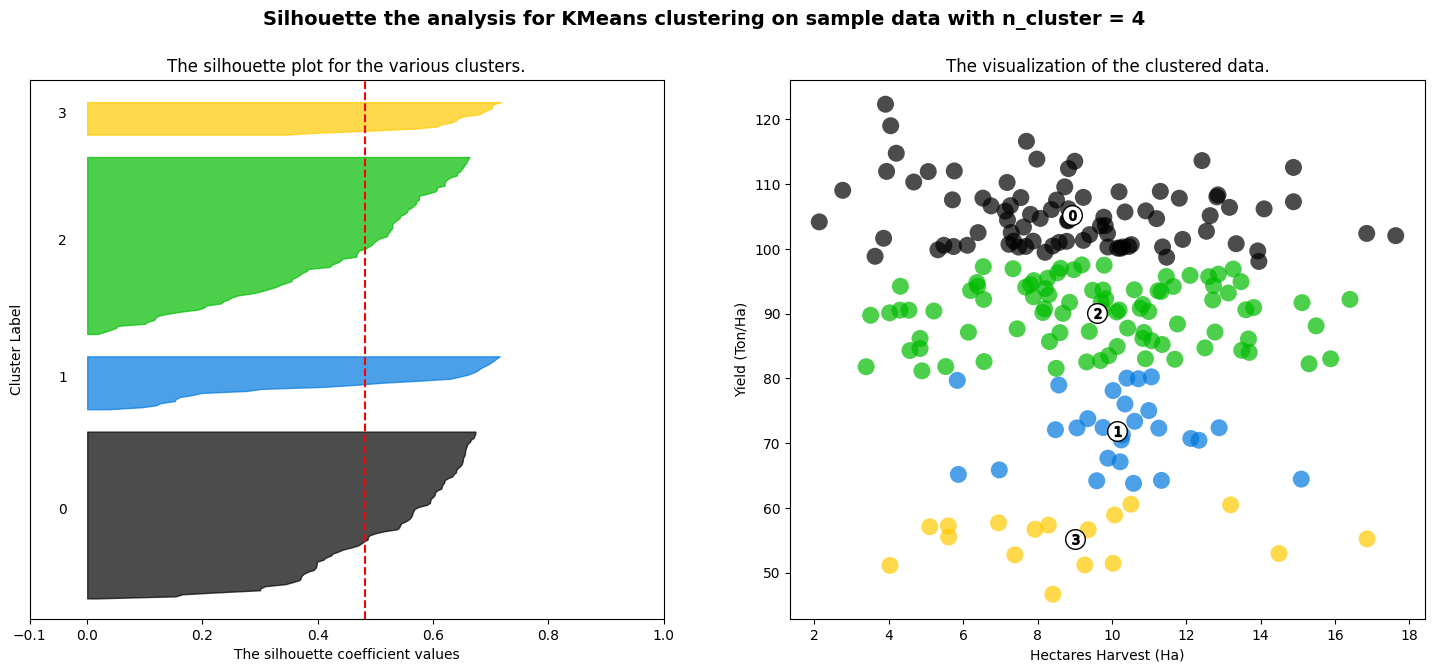

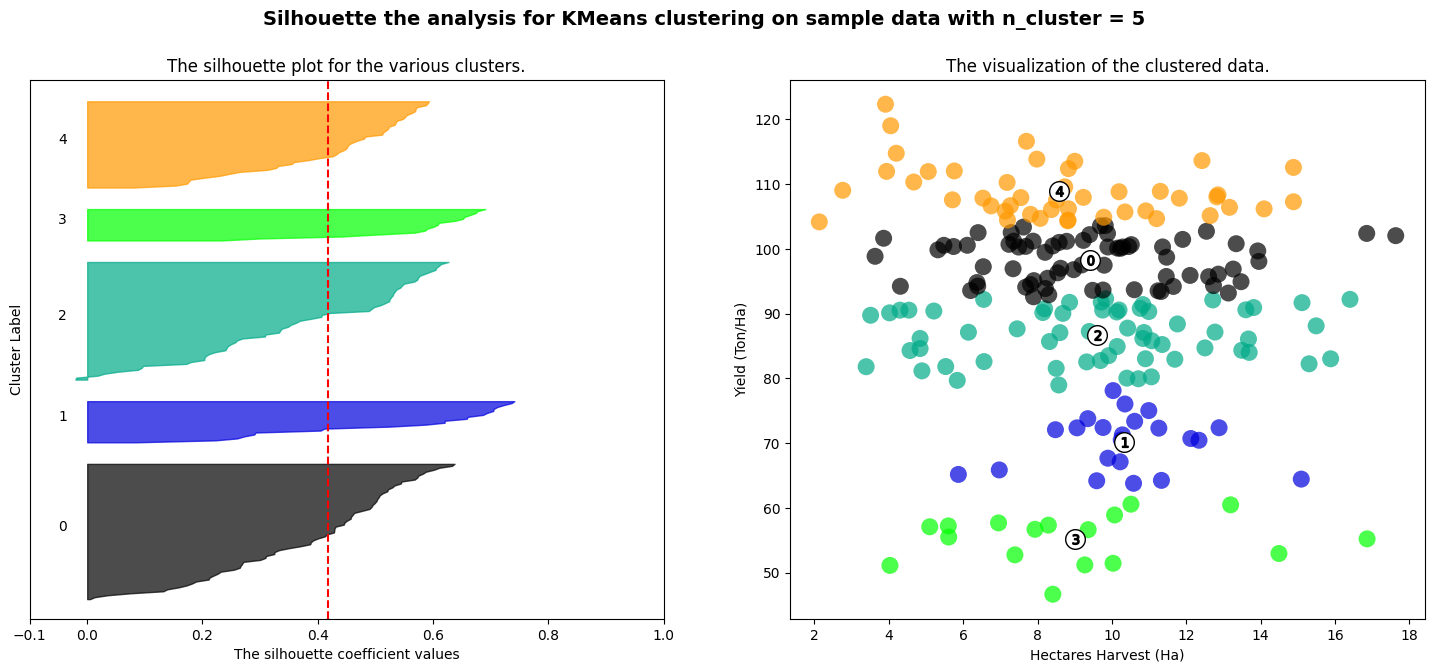

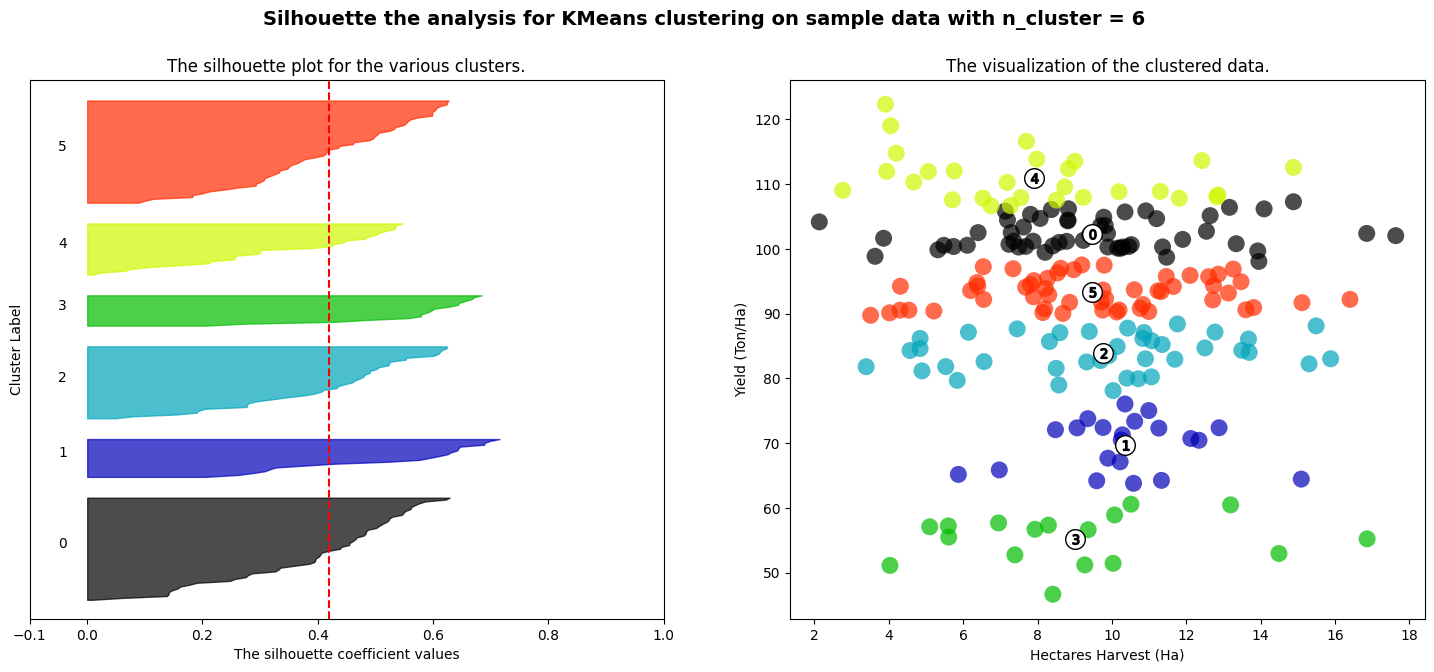

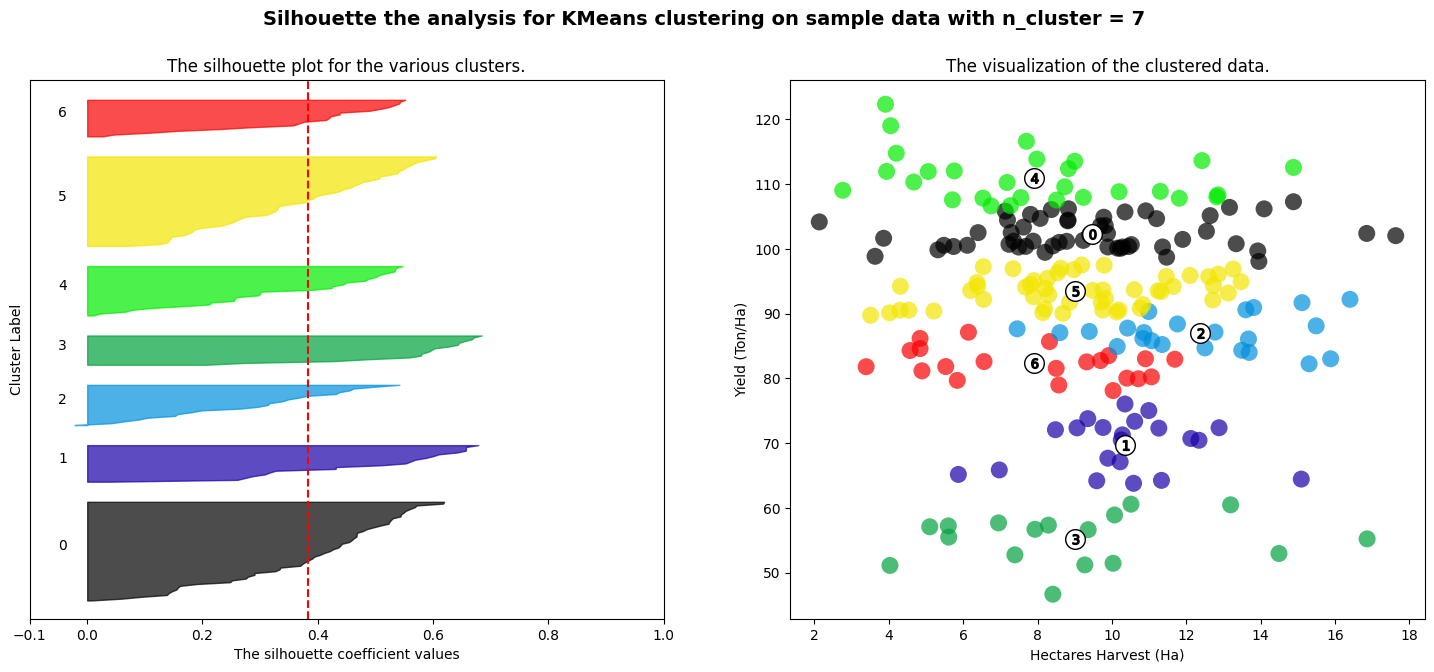

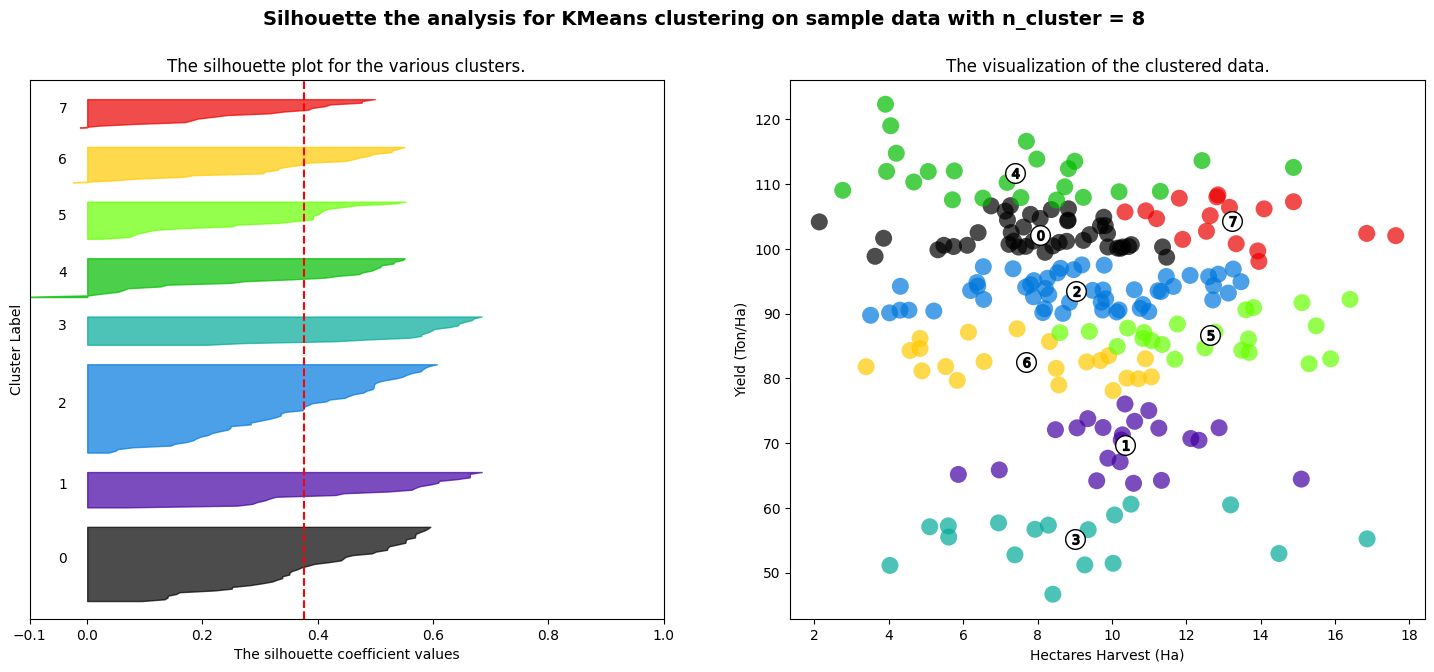

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # create a subplot with 1 row and 2 columns
    fig,(ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # the 1st sub plot is the silhouette plot
    # the silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # the (n_clusters+1)*10 is for inserting space between silhouette
    # plot of individual clusters, to demarcate them clearly
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # the silhouette_score gives the average value for all the samples.
    # this gives a prespective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # compute the silhouette scores for each example
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for the next plot
        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster Label")

    # the vertical line for average silhouette score of al the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) # clear the yaxis label / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing the actual clusters found
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker="o", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # labeling the cluster
    centers = clusterer.cluster_centers_
    # draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k"
    )

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Hectares Harvest (Ha)")
    ax2.set_ylabel("Yield (Ton/Ha)")

    plt.suptitle(
        "Silhouette the analysis for KMeans clustering on sample data with n_cluster = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
# menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

[[ 9.63311475 70.35129195]
 [ 9.24824675 99.04275024]]


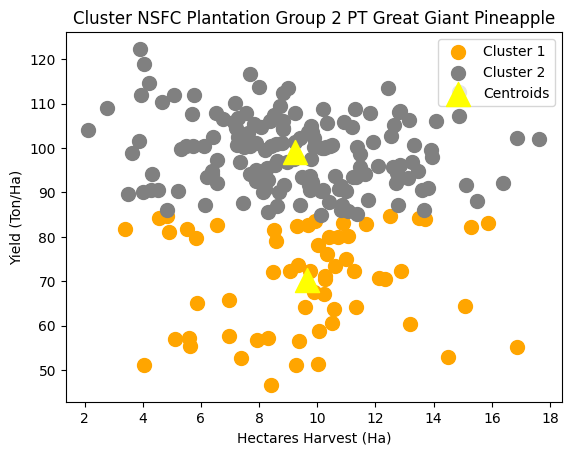

In [ ]:
# visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'gray', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', s = 300, c='yellow', label = 'Centroids')
print(kmeans.cluster_centers_)
plt.title('Cluster NSFC Plantation Group 2 PT Great Giant Pineapple')
plt.xlabel('Hectares Harvest (Ha)')
plt.ylabel('Yield (Ton/Ha)')
plt.legend()
plt.show()